In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Prepare the dataset

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)


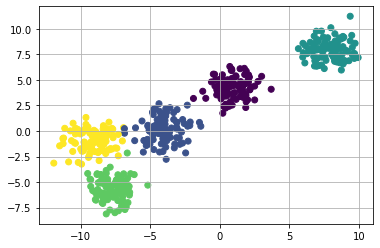

In [ ]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

As you can see in the above graph, we have ourselves a dataset that has been divided into 5 different groups. Now we will use K means algorithm to find the geometric centers to these groups 

In [ ]:
k = 5
color = ['green','blue','red','yellow','orange']
clusters = {}

for i in range(k):
  center = 10*(2*np.random.random((X.shape[1], ))-1)
  points = []
  
  cluster = {
      'center' : center,
      'points' : points,
      'color' : color[i]
  }
  clusters[i] = cluster


In [ ]:
def distance(x1,x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
def assign_pts_to_clusters(clusters):
  for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    for kx in range(k):
      d = distance(curr_x,clusters[kx]['center'])
      dist.append(d)
    current_cluster = np.argmin(dist)
    clusters[current_cluster]['points'].append(curr_x)

def update_clusters(clusters):
  for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    if pts.shape[0] > 0:
      new_u = pts.mean(axis = 0)
      clusters[kx]['center'] = new_u
      clusters[kx]['points'] = []


def plot_clusters(clusters):
  for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    try :
      plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
    except:
      pass

    uk = clusters[kx]['center']
    plt.scatter(uk[0],uk[1],color='black',marker = '*') 


  

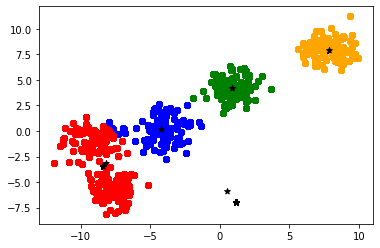

In [ ]:
for random in range(100):
  assign_pts_to_clusters(clusters)
  plot_clusters(clusters)
  update_clusters(clusters)

As you can see with random sampling we are able to achieve this result.

In [ ]:
km = KMeans(n_clusters = 5)
km.fit(X)

KMeans(n_clusters=5)

In [ ]:
centers = km.cluster_centers_
labels = km.labels_

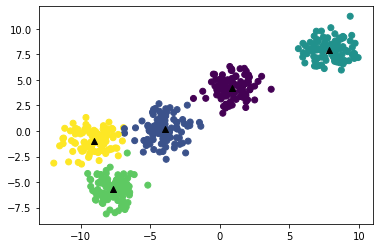

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

plt.scatter(centers[:,0],centers[:,1],color = 'black',marker = '^')

plt.show()